In [78]:
import numpy as np
import pandas as pd
import chardet as ct

In [79]:
# needed as encodings of different files can be different and can cause problems
with open('ml-1m/movies.dat','rb') as rawdata:
    result=ct.detect(rawdata.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [80]:
movies=pd.read_csv('ml-1m/movies.dat',sep='::',engine='python',header=None,names=['Index','Movie_name','Genre'],index_col='Index',encoding=result['encoding'])

In [81]:
movies.nunique()

Movie_name    3883
Genre          301
dtype: int64

In [82]:
movies.tail()

,Movie_name,Genre
Index,,
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama
3952,"Contender, The (2000)",Drama|Thriller


In [83]:
movies.head()

,Movie_name,Genre
Index,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [84]:
movies['Year']=movies['Movie_name'].str.extract(r'\(([0-9]{4})')
# Why the extra parenthesis after: "[0-9]{4}"? as extract requires a capture grp
# This capture grp is identified inside the parenthesis only, else it doesn't understand
# The regex syntax is right in itself, its the extract method that causes issues

movies['Movie_name']=movies['Movie_name'].str.replace(r'\((\d{4})\)','',regex=True)
# Notice I used different regex but both are basically the same
# Also notice, replace doesn't need a capture grp like extract(no paranthesis to end the regex)

In [85]:
movies.sample(10)

,Movie_name,Genre,Year
Index,,,
3822,"Girl on the Bridge, The (La Fille sur le Pont)",Drama|Romance,1999
3805,Knightriders,Action|Adventure|Drama,1981
3117,Ride with the Devil,Drama|Romance|War,1999
2026,Disturbing Behavior,Horror|Thriller,1998
387,"Low Down Dirty Shame, A",Action|Comedy,1994
149,Amateur,Crime|Drama|Thriller,1994
2897,And the Ship Sails On (E la nave va),Comedy|War,1984
3285,"Beach, The",Adventure|Drama,2000
1330,April Fool's Day,Comedy|Horror,1986


In [86]:
# Lets turn "Hobbit, The" type names to "The Hobbit" type
movies['Movie_name']=movies['Movie_name'].str.replace(r'^(.*), (The|An|A)',r'\2 \1',regex=True)
# Here \2 and \1 represents the 2 capture group from the earlier regex
# These are called backreferences, where \2 represents 2nd capture grp

In [87]:
movies.index.name="Movie_ID" # Renamed from index to Movie_ID
movies=movies.reset_index()
movies.index.name="Index"
movies.head(10)

,Movie_ID,Movie_name,Genre,Year
Index,,,,
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children's,1995
8,9,Sudden Death,Action,1995


In [88]:
movies_new=movies.copy()

In [89]:
# Now for seperating genres in a new dataframe
movies_new['Genre']=movies_new['Genre'].str.split('|')

# Explode needs a list of string that's why we split here

In [90]:
movies_new.sample(10)

,Movie_ID,Movie_name,Genre,Year
Index,,,,
3089,3158,The Emperor and the Assassin (Jing ke ci qin w...,[Drama],1999
1528,1568,MURDER and murder,"[Crime, Drama, Mystery]",1996
2951,3020,Falling Down,"[Action, Drama]",1993
668,674,Barbarella,"[Adventure, Sci-Fi]",1968
1269,1289,Koyaanisqatsi,"[Documentary, War]",1983
3720,3789,The Pawnbroker,[Drama],1965
1165,1181,The Shooter,[Action],1995
318,321,Strawberry and Chocolate (Fresa y chocolate),[Drama],1993
2934,3003,Train of Life (Train De Vie),"[Comedy, Drama]",1998


In [91]:
exploded=movies_new.explode('Genre')
"""
Use of explode:
It takes a single row with a list-like value (e.g., a list of genres) and 
creates a new row for each item in that list. 
The data in the other columns is duplicated.
"""

'\nUse of explode:\nIt takes a single row with a list-like value (e.g., a list of genres) and \ncreates a new row for each item in that list. \nThe data in the other columns is duplicated.\n'

In [92]:
exploded.head(10)

,Movie_ID,Movie_name,Genre,Year
Index,,,,
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children's,1995
0,1,Toy Story,Comedy,1995
1,2,Jumanji,Adventure,1995
1,2,Jumanji,Children's,1995
1,2,Jumanji,Fantasy,1995
2,3,Grumpier Old Men,Comedy,1995
2,3,Grumpier Old Men,Romance,1995
3,4,Waiting to Exhale,Comedy,1995


In [93]:
with open('ml-1m/ratings.dat','rb') as rat:
    result=ct.detect(rat.read())
    # print(result)

head=['UserID','Movie_id','Ratings','Timestamp']
ratings=pd.read_csv('ml-1m/ratings.dat',sep='::',names=head,index_col='Movie_id',encoding=result['encoding'])

/tmp/ipykernel_22547/477480043.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_csv('ml-1m/ratings.dat',sep='::',names=head,index_col='Movie_id',encoding=result['encoding'])


In [94]:
ratings.head()

,UserID,Ratings,Timestamp
Movie_id,,,
1193,1,5,978300760
661,1,3,978302109
914,1,3,978301968
3408,1,4,978300275
2355,1,5,978824291


In [95]:
# Currently the timestamp is in Unix timestamp also known as the epoch timestamp
ratings['Timestamp']=pd.to_datetime(ratings['Timestamp'],unit='s')
# 's' specifies seconds

In [96]:
ratings.index.name="Movie_ID"
ratings.head()
# Notice now timestamp has both date and time, lets seperate them out

,UserID,Ratings,Timestamp
Movie_ID,,,
1193,1,5,2000-12-31 22:12:40
661,1,3,2000-12-31 22:35:09
914,1,3,2000-12-31 22:32:48
3408,1,4,2000-12-31 22:04:35
2355,1,5,2001-01-06 23:38:11


In [97]:
# ratings['Date']=ratings['Timestamp'].str.extract(r'(\d{4}-\d{2}-\d{2})')
"""Can't do the above as a datetime object can't be converted to string type"""

ratings['Date']=ratings['Timestamp'].dt.date
ratings['Timestamp']=ratings['Timestamp'].dt.time
ratings.rename(columns={'Timestamp':'Time'},inplace=True)
ratings.head()

,UserID,Ratings,Time,Date
Movie_ID,,,,
1193,1,5,22:12:40,2000-12-31
661,1,3,22:35:09,2000-12-31
914,1,3,22:32:48,2000-12-31
3408,1,4,22:04:35,2000-12-31
2355,1,5,23:38:11,2001-01-06


In [98]:
movies.index.max()

3882

In [99]:
movies.isna().sum()

Movie_ID      0
Movie_name    0
Genre         0
Year          0
dtype: int64

In [100]:
ratings.index.max()

3952

#### both have the same number of entries BUT the index datatype is different

In [101]:
ratings['UserID'].unique()
ratings=ratings.reset_index() # Great method, resets the indexes to default 0-total entries, while the old values in index get pushed to a new column with same name
"""
Why did i do it?
well because i made an incorrect assumptions that the Movie_ID are unique, without even checking the total entries of each columns including Movie_ID
"""
ratings.head()

,Movie_ID,UserID,Ratings,Time,Date
0,1193,1,5,22:12:40,2000-12-31
1,661,1,3,22:35:09,2000-12-31
2,914,1,3,22:32:48,2000-12-31
3,3408,1,4,22:04:35,2000-12-31
4,2355,1,5,23:38:11,2001-01-06


In [102]:
ratings.isna().sum()

Movie_ID    0
UserID      0
Ratings     0
Time        0
Date        0
dtype: int64

#### Cleaning users:

In [103]:
with open('ml-1m/users.dat','rb') as user:
    result=ct.detect(user.read())
    # print(result)
# UserID::Gender::Age::Occupation::Zip-code
head=['UserID','Gender','Age','Occupation','Zip-code']
users=pd.read_csv('ml-1m/users.dat',sep='::',names=head,encoding=result['encoding'],engine='python')

In [104]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [105]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [106]:
users['Gender'].value_counts()

Gender
M    4331
F    1709
Name: count, dtype: int64

In [107]:
users['Age']=np.where(users['Age']<18,(users['Age'].mean()),np.int64(users['Age']))
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,30.639238,10,48067
1,2,M,56.000000,16,70072
2,3,M,25.000000,15,55117
3,4,M,45.000000,7,02460
4,5,M,25.000000,20,55455


Users seem to be pretty clean already, so lets focus on merge tables and pivot tables next!

In [108]:
movies.head()

,Movie_ID,Movie_name,Genre,Year
Index,,,,
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [109]:
movies_new.head()

,Movie_ID,Movie_name,Genre,Year
Index,,,,
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [110]:
ratings.head()

,Movie_ID,UserID,Ratings,Time,Date
0,1193,1,5,22:12:40,2000-12-31
1,661,1,3,22:35:09,2000-12-31
2,914,1,3,22:32:48,2000-12-31
3,3408,1,4,22:04:35,2000-12-31
4,2355,1,5,23:38:11,2001-01-06


### Stuff to do:
- Genre wise ratings(avg and count)
- Age wise favourite movies(or genre)

In [111]:
exploded.head()

,Movie_ID,Movie_name,Genre,Year
Index,,,,
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children's,1995
0,1,Toy Story,Comedy,1995
1,2,Jumanji,Adventure,1995
1,2,Jumanji,Children's,1995


In [112]:
"""merged 'exploded' and 'ratings' dataframes"""
merge1=pd.merge(left=exploded,right=ratings,on='Movie_ID',how='inner')
# Inner join because both dfs have different number of unique enteries, we will consider only those entries that are common in both 
merge1.head()

,Movie_ID,Movie_name,Genre,Year,UserID,Ratings,Time,Date
0,1,Toy Story,Animation,1995,1,5,23:37:48,2001-01-06
1,1,Toy Story,Animation,1995,6,4,04:30:08,2000-12-31
2,1,Toy Story,Animation,1995,8,4,03:31:36,2000-12-31
3,1,Toy Story,Animation,1995,9,5,01:25:52,2000-12-31
4,1,Toy Story,Animation,1995,10,5,01:34:34,2000-12-31


In [113]:
# genre_ratings=pd.DataFrame()
# genre_ratings['Uni_Genres']=merge1['Genre'].unique()
# genre_ratings.head()

In [114]:
# Understand this then only remove the above cell(the one commented out)+other ways that GPT suggested
genre_ratings=merge1.pivot_table(
    index='Genre',
    columns='Ratings',
    values='Movie_ID',
    aggfunc='count',
    fill_value=0
)
genre_ratings


Ratings,1,2,3,4,5
Genre,,,,,
Action,16531,31432,70728,86579,52187
Adventure,8494,16641,37867,44343,26608
Animation,2097,3587,10973,15841,10795
Children's,5875,8637,20396,23704,13574
Comedy,21616,41073,96946,123415,73530
Crime,3219,7433,19542,28454,20893
Documentary,271,477,1446,3032,2684
Drama,12114,29154,84821,131811,96629
Fantasy,2367,4729,10491,11725,6989


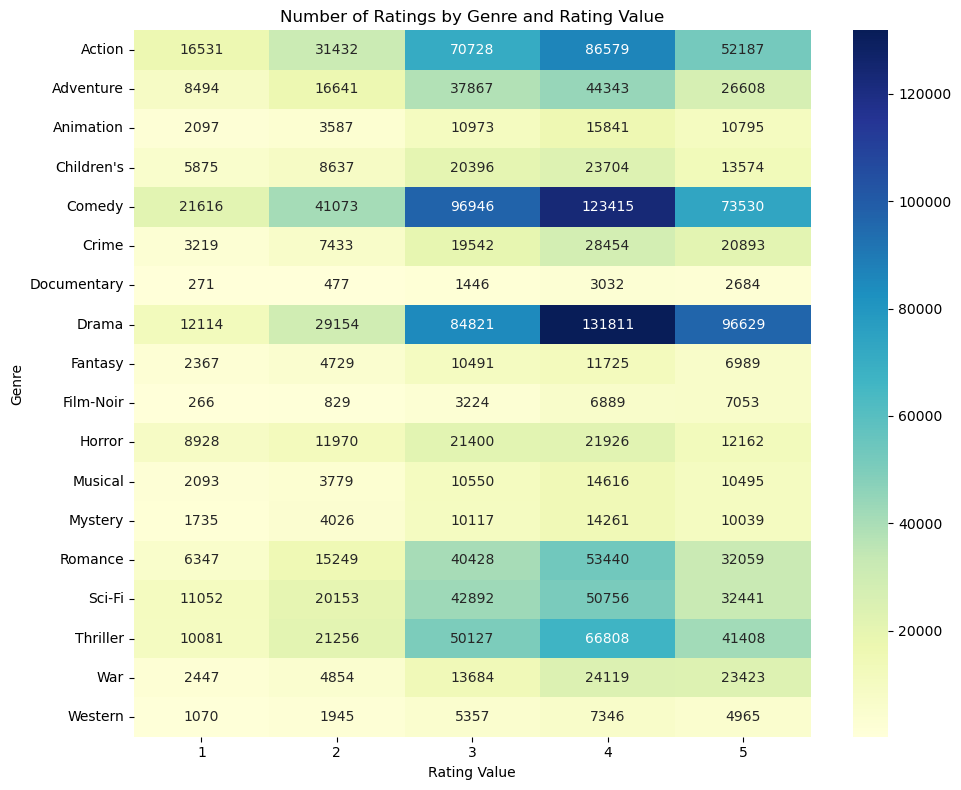

In [115]:
# Took Gpt's help for the below snippet(I have to learn plotting using matplot and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    genre_ratings,
    annot=True,       # show numbers in cells
    fmt='d',          # integer formatting
    cmap='YlGnBu'     # color palette
)

plt.title("Number of Ratings by Genre and Rating Value")
plt.xlabel("Rating Value")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [126]:
"""Merging ratings and users Dataframes"""
merge2=pd.merge(left=users,right=merge1,on='UserID',how='inner')

In [128]:
age_pivot=merge2.pivot_table(
    index=['Genre','Age'],
    columns='Ratings',
    values='Movie_ID',
    aggfunc='count',
    fill_value=0
)
age_pivot.head(15)

Ratings                 1      2      3      4      5
Genre     Age                                        
Action    18.000000  3863   6487  13502  16017  10317
          25.000000  7495  13512  29008  34914  20749
          30.639238   537    784   1620   2085   1552
          35.000000  2610   5838  14036  17804  10215
          45.000000   923   2267   5601   6788   3778
          50.000000   730   1703   4785   6025   3769
          56.000000   373    841   2176   2946   1807
Adventure 18.000000  2180   3473   7264   8227   5180
          25.000000  3591   6827  14979  17138  10098
          30.639238   338    509   1027   1264    860
          35.000000  1379   3174   7636   9305   5188
          45.000000   479   1300   3147   3686   2126
          50.000000   353    896   2579   3212   2050
          56.000000   174    462   1235   1511   1106
Animation 18.000000   628    939   2630   3541   2531

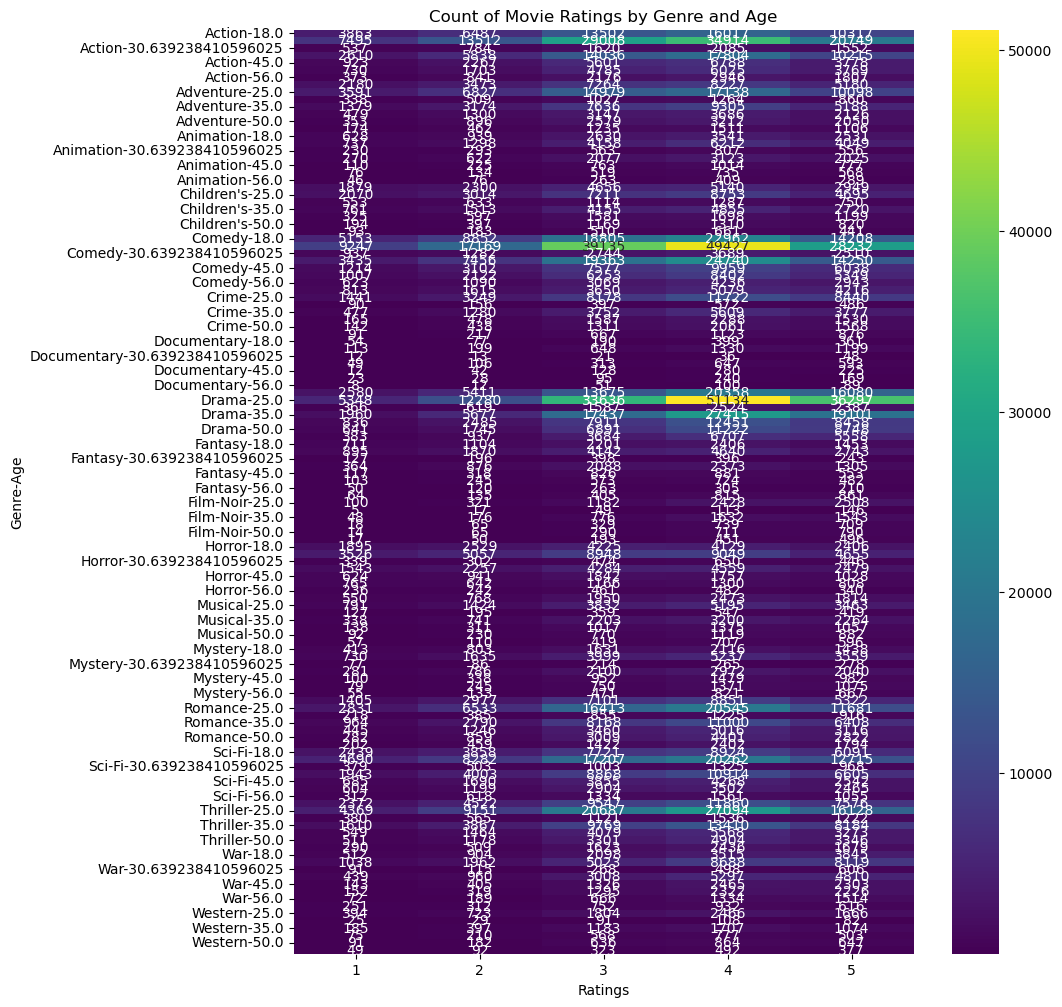

In [129]:
plt.figure(figsize=(10, 12))

# Create the heatmap
sns.heatmap(
    age_pivot,
    annot=True,      # Show the numbers in each cell
    fmt='d',         # Format numbers as integers
    cmap='viridis'   # Choose a color map (e.g., 'viridis', 'coolwarm', 'YlGnBu')
)

# Add a title and show the plot
plt.title('Count of Movie Ratings by Genre and Age')
plt.show()
